## **Importing the necessary libraries**

In [1]:
# Library used for data manipulation and analysis
import pandas as pd

# Library used for working with arrays
import numpy as np  

# Libraries for visualization
import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns  

# This library contains a large number of probability distributions as well as a 
# growing library of statistical functions
import scipy.stats as stats

## **Binomial Distribution**

In [2]:
# Prepare the environment
np.set_printoptions(suppress=True)
suptitle_param = dict(color='darkslategray', weight='bold', fontsize='x-large')

def binomial_distribution(n, p, show_plot=True):
    """Provide a binomial distribution based on parameters defined.
    n: int. sample size.
    p: probability of success
    show_plot: whether or not plot the distribution
    Returns:
    binomial: binomial distribution generated.
    events: possible values in events
    """
    events = np.arange(0, n+1) # possible values
    binomial = stats.binom(n=n, p=p)
    
    if show_plot:
        # PMF representation
        fig = plt.figure(figsize=(6,3))
        plt.stem(events, binomial.pmf(events), 'C0-')
        plt.xlabel('Number of Successes')
        plt.ylabel('PMF')
        plt.xticks(events)
        plt.title("Binomial n={} p={}".format(n, p), **suptitle_param)
        plt.show()
    
    return binomial, events

### **Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for LED light bulbs, that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.**

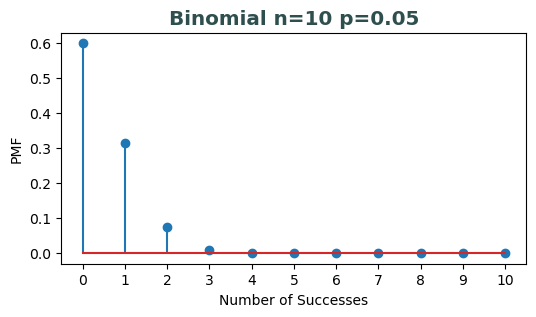

Binomial distribution: [ 0  1  2  3  4  5  6  7  8  9 10]
Probabilities: [0.59873694 0.3151247  0.0746348  0.01047506 0.00096481 0.00006094
 0.00000267 0.00000008 0.         0.         0.        ]


In [3]:
n = 10   # sample size
p = 0.05 # failure rate for LED light bulbs

binomial, events = binomial_distribution(n, p)
print('Binomial distribution:', events)
print('Probabilities:', binomial.pmf(events))

**a) What is the probability that none of the LED bulbs are defective?**

In [4]:
prob = binomial.pmf(k=0)
print(f'The probability that none of the LED bulbs are defective is {prob:.4f}')

The probability that none of the LED bulbs are defective is 0.5987


**b) What is the probability that exactly one LED bulb is defective?**

In [5]:
prob = binomial.pmf(k=1)
print(f'The probability that one of the LED bulbs are defective is {prob:.4f}')

The probability that one of the LED bulbs are defective is 0.3151


**c) What is the probability that two or fewer LED bulbs are defective?**

**Hint:** We need to calculate the cumulative probability of two or fewer LED bulbs being defective.

In [6]:
prob = binomial.cdf(2)
print(f'The probability that two or fewer LED bulbs are defective is {prob:.4f}')

The probability that two or fewer LED bulbs are defective is 0.9885


**d) What is the probability that three or more LED bulbs are defective?**

**Hint:** We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [7]:
prob = binomial.sf(2)
print(f'The probability that three or more LED bulbs are defective is {prob:.4f}')
1 - binomial.cdf(2)

The probability that three or more LED bulbs are defective is 0.0115


0.01150355737929687

### **Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of foul shots is 93%. Find the following probabilities.**

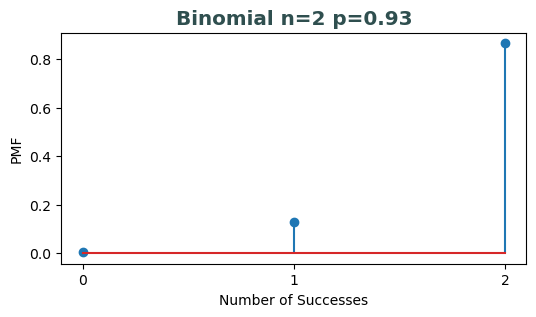

Binomial distribution: [0 1 2]
Probabilities: [0.0049 0.1302 0.8649]


In [8]:
n = 2    # sample size
p = 0.93 # conversion rate of foul shots

binomial, events = binomial_distribution(n, p)
print('Binomial distribution:', events)
print('Probabilities:', binomial.pmf(events))

**a) What is the probability that the player will convert both the shots?**

In [9]:
prob = binomial.pmf(2)
print(f'The probability that player convert both shots is {prob:.4f}')

The probability that player convert both shots is 0.8649


**b) What is the probability that the player will convert at least one shot?**

In [10]:
prob = binomial.sf(0)
print(f'The probability that player convert at least one shot is {prob:.4f}')
1 - binomial.cdf(0)

The probability that player convert at least one shot is 0.9951


0.9951

### **Q3. Over a long period in a large multinomial corporation, 10% of all sales trainees are rated as outstanding, 75% are rated as excellent, 10% are rated as satisfactory, and 5% are rated as unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.**

**a) Two are rated as outstanding**

In [11]:
# Working with outstanding and excellent binomial distribution
n = 10   # sample size
p_10 = 0.1 
binom_10, events = binomial_distribution(n, p_10, show_plot=False)

prob = binom_10.pmf(2)
print(f'The probability that two trainees are rated as oustanding is {prob:.4f}')

The probability that two trainees are rated as oustanding is 0.1937


**b) Two or more are rated as outstanding**

In [12]:
prob = binom_10.sf(1)
print(f'The probability that two or more trainees are rated as oustanding is {prob:.4f}')
1 - binom_10.cdf(1)

The probability that two or more trainees are rated as oustanding is 0.2639


0.26390107090000003

**c) Eight of the ten are rated either outstanding or excellent**

In [13]:
# Probability of excellent or outstanding is 0.75 + 0.10
p_85 = 0.85 
n = 10 # sample size
binom_85, events = binomial_distribution(n, p_85, show_plot=False)

prob = binom_85.pmf(8)
print(f'The probability that 8 trainees are rated as oustanding or as excellent is {prob:.4f}')

The probability that 8 trainees are rated as oustanding or as excellent is 0.2759


**d) None of the trainees are rated as unsatisfactory**

In [14]:
# Working with excellent binomial distribution
n = 10 # sample size
p_5 = 0.05 
binom_5, events = binomial_distribution(n, p_5, show_plot=False)

prob = binom_5.pmf(0)
print(f'The probability that 8 trainees are rated as oustanding or as excellent is {prob:.4f}')

The probability that 8 trainees are rated as oustanding or as excellent is 0.5987


## **Uniform Distribution**

In [15]:
def plot_hist_uniform_distro(feature, xlabel, type='hist'):
    """Histogram of uniform distribution
    feature: 1-d array of data.
    xlabel: string. Label of x axis.
    type: if 'hist' plot a plt.hist, if 'histplot' plot a sns.histplot
    """
    if type=='hist':
        plt.figure(figsize=(6,3))
        bar = plt.hist(feature, density=True)
        plt.axhline(bar[0].mean(), color="red")
        plt.xlabel(xlabel)
        plt.ylabel("Probability")
        plt.title("Data Distribution", **suptitle_param)
        plt.show()
    
    if type=='histplot':
        plt.figure(figsize = (6, 3))
        sns.histplot(feature, kde=True, stat="density", kde_kws=dict(cut=3))
        plt.xlabel(xlabel)
        plt.ylabel("Probability")
        plt.title("Data Distribution", **suptitle_param)
        plt.show()

### **Q4. A university records the time taken by students to solve the statistics assignment in 'assignment.csv’. Plot the probability distribution this data follows and answer the following questions.**

### **Loading the dataset**

In [16]:
assignment = pd.read_csv('data/assignment.csv')
assignment.head()

,Student_ID,Time_taken
0,955,2.79
1,379,3.32
2,922,1.35
3,312,2.35
4,670,1.98


In [17]:
assignment.describe()

,Student_ID,Time_taken
count,1000.000000,1000.000000
mean,508.611000,2.497440
std,293.527757,0.851082
min,2.000000,1.000000
25%,256.000000,1.767500
50%,525.000000,2.500000
75%,760.250000,3.230000
max,999.000000,4.000000


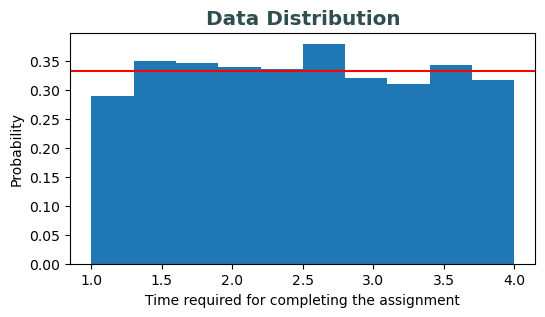

In [18]:
plot_hist_uniform_distro(assignment.Time_taken, "Time required for completing the assignment")

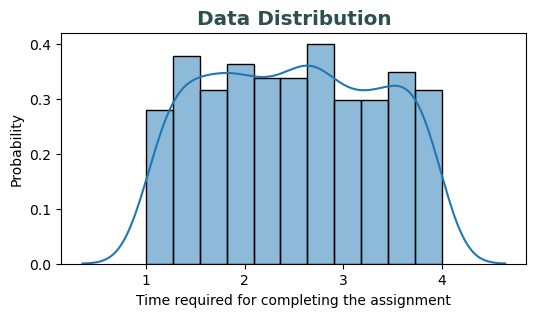

In [19]:
plot_hist_uniform_distro(assignment.Time_taken, "Time required for completing the assignment", 
                         type='histplot')

**Insight**: The above plot shows that all the values between 1 and 4 have almost equal probability. We are going to use continuous uniform distribution. We need to decide the endpoints. Here, the endpoints are 1 and 4.

X ~ U(1, 4)

In [20]:
uniform = stats.uniform(loc=1, scale=3) # loc: min value, scale: range to max value

**a) Find the probability that a randomly selected student requires at most 2.5 hours to complete the assignment.**

**CDF** of a random variable (X) is the probability that X will take the value less than or equal to x. Mathematically, it can be represented as:

>$F_X(x) = P(X\leq x)$

In our case, the random variable (X) is the number of hours.

$ P(X\leq 2.5)$

In [21]:
prob = uniform.cdf(2.5)
print(f'The probability that a stundent requires at most 2.5 hrs is {prob:.4f}')

The probability that a stundent requires at most 2.5 hrs is 0.5000


**b) Find the probability that a randomly selected student requires at least 3 hours to complete the quiz.**

$ P(X >= 3)$

In [22]:
prob = uniform.sf(3)
print(f'The probability that a stundent requires at least 3 hrs is {prob:.4f}')
1 - uniform.cdf(3)

The probability that a stundent requires at least 3 hrs is 0.3333


0.33333333333333337

**c) Find the probability that a randomly selected student requires 1.5 to 3.5 hours to complete the quiz.**

$ P(1.5 <= X <= 3.5)$

In [23]:
prob = uniform.sf(1.5) - uniform.sf(3.5)
print(f'The probability that a stundent requires between 1.5 and 3.5 hrs is {prob:.4f}')

The probability that a stundent requires between 1.5 and 3.5 hrs is 0.6667


## **Normal Distribution**

In [24]:
def plot_normal_distribution(mu, sigma):
    """Plot of a normal distribution.
    mu: mean of the distribution
    sigma: std of the distribution
    """
    # calculate the pdf of SAT scores using norm.pdf()
    density = pd.DataFrame() # create an empty DataFrame

    # create an array of 100 numbers in between the min and max score range and store it in the 
    # first column of the empty DataFrame
    density["x"] = np.linspace(mu-4*sigma, mu+4*sigma, 100000) 

    # calculate the pdf() of the created numbers and store it in another column named 'pdf'
    density["pdf"] = stats.norm.pdf(density["x"], mu, sigma) 

    # plot the distribution of data using histogram
    fig, ax = plt.subplots(figsize = (6, 3)) 
    plt.plot(density["x"], density["pdf"], color="red") # pdf of the normal distribution
    plt.axvline(mu, color='k', ls='--', label='Mean')
    plt.legend()
    plt.title("Normal Distribution") 
    plt.show() 

### **Q5. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850, with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.**

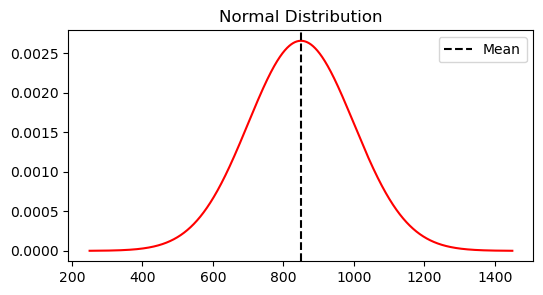

In [25]:
# Plotting the normal distribution
mu = 850
sigma = 150
plot_normal_distribution(mu, sigma)

# Preparing the scenario
normal = stats.norm(loc=mu, scale=sigma)

**a) What is the probability that a randomly selected cell phone bill is more than Rs. 1200?**

In [26]:
prob = normal.sf(1200)
print(f'The probability that a cell phone bill more than 1200 is {prob:.4f}')

The probability that a cell phone bill more than 1200 is 0.0098


**b) What is the probability that a randomly selected cell phone bill is between Rs. 750 and Rs. 1200?**

In [27]:
prob = normal.cdf(1200) - normal.cdf(750)
print(f'The probability that a cell phone bill between 750 and 1200 is {prob:.4f}')

The probability that a cell phone bill between 750 and 1200 is 0.7377


**c) What is the probability that a randomly selected cell phone bill is no more than Rs. 650?**

In [28]:
prob = normal.cdf(650)
print(f'The probability that a cell phone bill no more than 650 is {prob:.4f}')

The probability that a cell phone bill no more than 650 is 0.0912


**d) What is the amount above which lies the top 15% of cell phone bills?**

**Hint:** Let the amount be $M$. 

$P(X ≥ M) = 0.15$

$=> 1 – P(X < M) = 0.15$

$=> P(X < M) = 0.85$

In [29]:
bill_ppf = normal.ppf(1-0.15)
print(f'The amount that lies the top 15% phone bills is {bill_ppf:.4f}')

The amount that lies the top 15% phone bills is 1005.4650


**e) What is the amount below which lies the bottom 25% of cell phone bills?**

In [30]:
bill_ppf = normal.ppf(0.25)
print(f'The amount that lies the bottom 25% phone bills is {bill_ppf:.4f}')

The amount that lies the bottom 25% phone bills is 748.8265


### **Q6. The mean filling capacity for a Coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.**

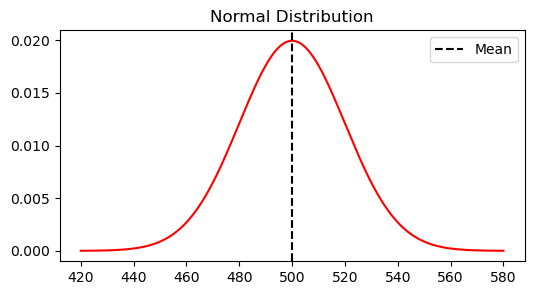

In [31]:
# Plotting the normal distribution
mu = 500
sigma = 20
plot_normal_distribution(mu, sigma)

# Preparing the scenario
normal = stats.norm(loc=mu, scale=sigma)

**a) What is the probability that the bottle filled less than 480 ml of Coke?**

In [32]:
prob = normal.cdf(480)
print(f'The probability that a bottle filled less than 480ml is {prob:.4f}')

The probability that a bottle filled less than 480ml is 0.1587


**b) What is the probability that the bottle filled more than 520 ml of Coke?**

In [33]:
prob = normal.sf(520)
print(f'The probability that a bottle filled more than 520ml is {prob:.4f}')

The probability that a bottle filled more than 520ml is 0.1587


**c) What is the probability that the bottle filled between 470 ml to 525 ml of Coke?**

In [34]:
prob = normal.cdf(525) - normal.cdf(470)
print(f'The probability that a bottle filled between 470ml and 525ml is {prob:.4f}')

The probability that a bottle filled between 470ml and 525ml is 0.8275


### Q7: **In 2-liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to a penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.**

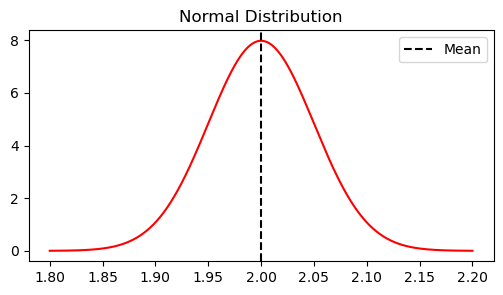

In [35]:
# Plotting the normal distribution
mu = 2
sigma = 0.05
plot_normal_distribution(mu, sigma)

# Preparing the scenario
normal = stats.norm(loc=mu, scale=sigma)

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [36]:
prob = normal.cdf(2) - normal.cdf(1.9)
print(f'The probability that a bottle content is between 1.9l and 2l is {prob:.4f}')

The probability that a bottle content is between 1.9l and 2l is 0.4772


**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [37]:
prob = normal.cdf(2.1) - normal.cdf(1.9)
print(f'The probability that a bottle content is between 1.9l and 2.1l is {prob:.4f}')

The probability that a bottle content is between 1.9l and 2.1l is 0.9545


**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [38]:
prob = normal.cdf(1.9) + normal.sf(2.1)
print(f'The probability that a bottle content is below 1.9l is {prob:.4f}')

The probability that a bottle content is below 1.9l is 0.0455


**d) 99% of the bottles contain at least what amount of soft drink in them?**

In [39]:
content_ppf = normal.ppf(0.01) # left limit: 0.01% ==> at least
print(f'The least amount that a bottel needs to have in order to belong to 99% is {content_ppf:.4f}')

The least amount that a bottel needs to have in order to belong to 99% is 1.8837


## **Sampling Distribution**

### **Q8. Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery life is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.**

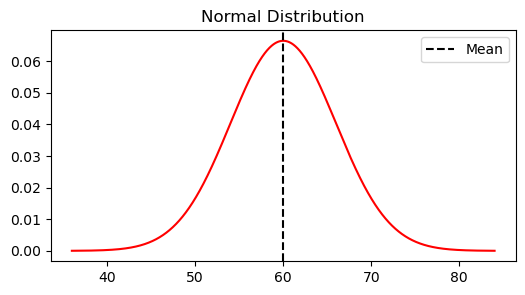

In [40]:
# Plotting the normal distribution
mu = 60
sigma = 6
plot_normal_distribution(mu, sigma)

In [41]:
# Working with the sample
n = 40
mean = mu #60
std = sigma / np.sqrt(n)

# Preparing the scenario
normal = stats.norm(loc=mean, scale=std)
prob = normal.cdf(58)
print(f'The probability of 40 bateries have a mean lifetime less than 58 months is {prob:.4f}')

The probability of 40 bateries have a mean lifetime less than 58 months is 0.0175


**Insight:** 

The probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months is 1.75%.

## **Interval Estimation**

### **Q9. A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2022. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.**

### **Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating the 95% confidence interval for the mean usage in the first quarter of 2022.**

In [42]:
x_bar, sigma = 310, 89 # set the values of sample mean and sigma
n = 40                 # set the value of sample size
ci = 0.95              # Set the confidence level

# construct the confidence interval
mean_ci = np.round(stats.norm.interval(ci, loc=x_bar, 
                                       scale=sigma / np.sqrt(n)), 4)  # Last param: decimals.
print('95% CI of mean man height in cm: ', mean_ci)

95% CI of mean man height in cm:  [282.4191 337.5809]


## **Hypothesis Testing**

### **Q10. You are the manager of a Chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. State the null and alternative hypothesis.**

The null hypothesis is that the population mean has not changed from its previous value of 4.5 minutes. This is denoted as:
$$ H_o = \mu = 4.5 $$

The alternative hypothesis is the opposite of the null hypothesis. Because the null hypothesis is that the population mean is 4.5 minutes, the alternative hypothesis is that the population mean is not 4.5 minutes. This is denoted as:
$$ H_a = \mu \neq 4.5 $$

### **Q11. Find the p-value of a two-tailed hypothesis test if the Z-stat = +2.00?**

><span style='color:red'>**Note:** P-value for a two-tailed test is always two times the P-value for either of the one-tailed tests.</span>

In [43]:
# calculate the p-value
p_value = stats.norm.sf(2)
p_value
# 1 - stats.norm.cdf(2)

0.022750131948179195

In [44]:
print(f"""
This is a two-tailed test. 
So, the p_value is twice the p-value for the one-tailed test, i.e., {p_value*2:0.4f}
""")


This is a two-tailed test. 
So, the p_value is twice the p-value for the one-tailed test, i.e., 0.0455



_________